### Data Cleanup and Preparation, Feature Engineering

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
import seaborn as sns
import matplotlib.pyplot as plt
import math

sns.set()
sns.set_style('whitegrid')

data = pd.read_csv('TRAIN.csv')
data = data.rename(columns=lambda x: x.strip())   
data.shape

(1400, 16)

In [2]:
data.head()

,Customer ID,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status
0,ADF0039,123,4.10,76.7140,0.00,1.25,1.4951,14,564,6408,2,2G,2G,Uxaa,Mango,0
1,ADF0041,1316,43.87,98.8904,4.14,1.25,1.0244,27,1626,4373,1,2G,2G,Uxaa,Mango,0
2,ADF0051,2385,79.50,372.6300,3.51,1.25,6.0898,119,10411,22039,1,2G,2G,Weematel,Mango,0
3,ADF0059,1614,53.80,530.2000,6.85,1.25,3.3447,69,6822,6274,1,2G,2G,0,Mango,0
4,ADF0060,2175,72.50,554.1300,6.99,153.75,673204.0342,33,3387,7241,1,2G,3G,Weematel,Mango,0


In [3]:
data.columns

Index(['Customer ID', 'network_age', 'Customer tenure in month',
       'Total Spend in Months 1 and 2 of 2017', 'Total SMS Spend',
       'Total Data Spend', 'Total Data Consumption', 'Total Unique Calls',
       'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls',
       'Network type subscription in Month 1',
       'Network type subscription in Month 2',
       'Most Loved Competitor network in in Month 1',
       'Most Loved Competitor network in in Month 2', 'Churn Status'],
      dtype='object')

Let's add some features that might further explain categorical data

In [4]:
data['Consistent competitor'] = (data['Most Loved Competitor network in in Month 1'
                                    ] == data['Most Loved Competitor network in in Month 2']).astype(int)
# if the competitor in month 1 and month 2 are the same, it gives a 1

data['Network Upgrade'] = 0

data.loc[(data['Network type subscription in Month 1'] == '2G') & 
              (data['Network type subscription in Month 2'] == '3G'), 'Network Upgrade'] = 1

data.loc[(data['Network type subscription in Month 1'] == '3G') & 
              (data['Network type subscription in Month 2'] == '2G'), 'Network Upgrade'] = -1
# if there is an upgrade in network, +1, downgrade: -1, else, 0

data['Offnet/Onnet'] = data['Total Offnet spend']/data['Total Onnet spend']
data['SMS/Data'] = data['Total SMS Spend']/data['Total Data Spend']

data.loc[(data['Total Onnet spend'] >=-0.001) & (data['Total Onnet spend']<=0.001) & 
         (data['Total Offnet spend'] >= -0.001) & (data['Total Offnet spend'] <= 0.001), 'Offnet/Onnet'] = 1

data.loc[data["Offnet/Onnet"] == math.inf, "Offnet/Onnet"] = max(data.loc[data["Offnet/Onnet"] != math.inf, "Offnet/Onnet"])

data.loc[(data['Total Data Spend'] >= -0.001) & (data['Total Data Spend'] <= 0.001) & 
         (data['Total SMS Spend'] >= -0.001) & (data['Total SMS Spend'] <= 0.001), 'SMS/Data'] = 1

data.loc[data["SMS/Data"] == math.inf, "SMS/Data"] = max(data.loc[data["SMS/Data"] != math.inf, "SMS/Data"])



In [5]:
selected_data = data.iloc[:,1:]
stats = selected_data.describe()

In [6]:
stats.loc['IQR'] = stats.loc['75%'] -  stats.loc['25%']
stats.loc['Outlier max'] = stats.loc['IQR']*2 + stats.loc['75%']

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status,Consistent competitor,Network Upgrade,Offnet/Onnet,SMS/Data
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,1450.634286,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.500000,0.367857,0.014286,264.236215,125.061984
std,1276.008188,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,0.500179,0.482395,0.241680,504.510480,278.913615
min,-5.000000,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,287.000000,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,0.000000,0.000000,0.000000,0.965743,0.187067
50%,1171.000000,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.500000,0.000000,0.000000,3.309286,1.000000
75%,2242.000000,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000,1.000000,0.000000,31.034735,9.568000
max,5451.000000,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000,1.000000,1.000000,1263.104167,768.161290
IQR,1955.000000,65.165000,862.858000,28.585000,41.562500,1.205400e+06,236.250000,7117.750000,12028.50000,1.000000,1.000000,1.000000,0.000000,30.068992,9.380933
Outlier max,6152.000000,205.062500,2744.111500,88.375000,125.937500,3.617585e+06,726.750000,21413.250000,37208.50000,4.000000,3.000000,3.000000,0.000000,91.172718,28.329867


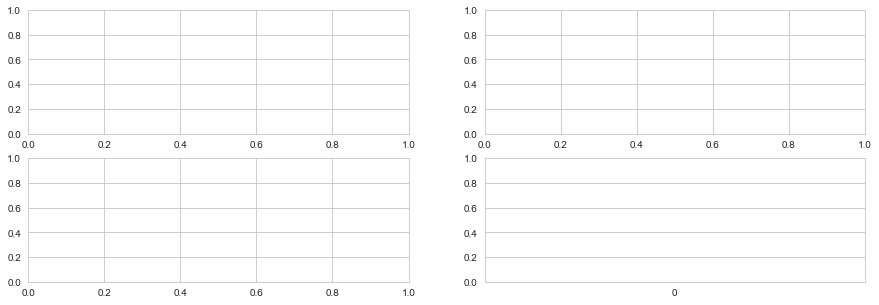

In [7]:
fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,5))
sns.boxplot()

In [8]:
selected_data[selected_data['network_age'] < 0]

,network_age,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Network type subscription in Month 1,Network type subscription in Month 2,Most Loved Competitor network in in Month 1,Most Loved Competitor network in in Month 2,Churn Status,Consistent competitor,Network Upgrade,Offnet/Onnet,SMS/Data
490,-5,-0.17,857.1008,63.47,190.03,1.565901e+06,204,716,1240,1,3G,3G,ToCall,ToCall,1,1,0,1.731844,0.334
916,-4,-0.13,2898.8240,25.10,1.25,3.058533e+05,642,0,82221,1,3G,3G,Mango,Weematel,1,0,0,1263.104167,20.080
1163,-2,-0.07,130.5780,94.85,1.25,2.195300e+00,7,150,1121,1,Other,Other,Uxaa,Uxaa,1,1,0,7.473333,75.880


Text(0.5,1,'Correlation matrix')

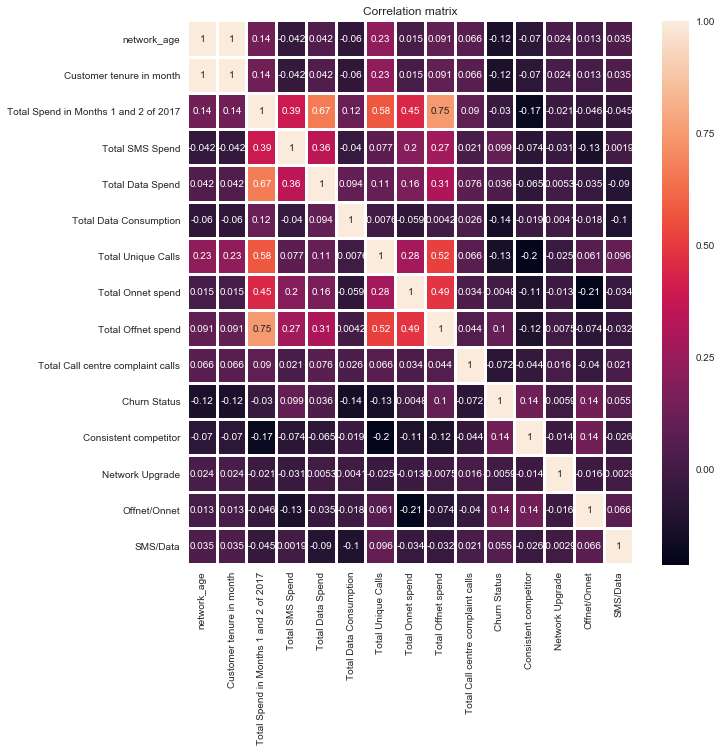

In [9]:
corr_matrix = selected_data.corr()
f, ax = plt.subplots(figsize=[10,10])
sns.heatmap(corr_matrix, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')

Correlation matrix shows that network_age and customer tenure in a month seem to be saying the same thing. We will drop network_age

In [10]:
#plt.scatter(x='network_age', y='Customer tenure in month', data=selected_data, s = 10)

In [11]:
selected_data.drop('network_age', inplace=True, axis=1)

Text(0,0.5,'Total Data Spend')

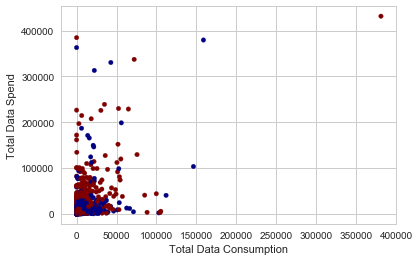

In [12]:
plt.scatter(x ='Total Onnet spend', y='Total Offnet spend', data = selected_data, s=20, c='Churn Status', cmap = 'jet')
plt.xlabel('Total Data Consumption')
plt.ylabel('Total Data Spend')
#plt.legend('on')

Text(0,0.5,'Total Onnet spend')

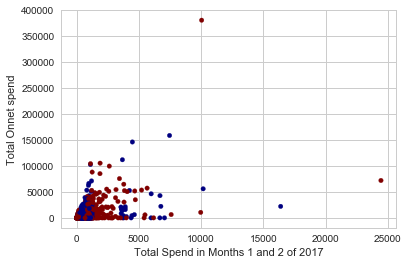

In [13]:
plt.scatter(x ='Total Spend in Months 1 and 2 of 2017', y='Total Onnet spend',data = selected_data, s=20, c='Churn Status', cmap = 'jet')
plt.xlabel('Total Spend in Months 1 and 2 of 2017')
plt.ylabel('Total Onnet spend')

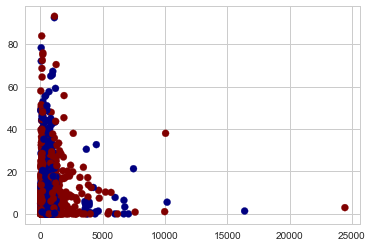

In [14]:
plt.scatter(selected_data['Total Spend in Months 1 and 2 of 2017'], 
            selected_data['Total Onnet spend']/selected_data['Total Spend in Months 1 and 2 of 2017'], c=selected_data['Churn Status'], cmap = 'jet')

In [15]:
network_month1_dummy = pd.get_dummies(selected_data['Network type subscription in Month 1'])
selected_data = selected_data.join(network_month1_dummy, rsuffix = "_1")
selected_data.drop('Network type subscription in Month 1', axis=1, inplace=True)

network_month2_dummy = pd.get_dummies(selected_data['Network type subscription in Month 2'])
selected_data = selected_data.join(network_month2_dummy, rsuffix = "_2")
selected_data.drop('Network type subscription in Month 2', axis=1, inplace=True)

competitor_month1_dummy = pd.get_dummies(selected_data['Most Loved Competitor network in in Month 1'])
selected_data = selected_data.join(competitor_month1_dummy, rsuffix = "_1")
selected_data.drop('Most Loved Competitor network in in Month 1', axis=1, inplace=True)

competitor_month2_dummy = pd.get_dummies(selected_data['Most Loved Competitor network in in Month 2'])
selected_data = selected_data.join(competitor_month2_dummy, rsuffix = "_2")
selected_data.drop('Most Loved Competitor network in in Month 2', axis=1, inplace=True)

In [16]:
selected_data['Churn Status'] = selected_data['Churn Status'].apply(lambda x: -1 if x==0 else 1)

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model

train_data, cv_data = train_test_split(selected_data, test_size=0.3, random_state=42)

In [18]:
train_x = train_data.drop('Churn Status', axis=1)
train_y = train_data['Churn Status']

cv_x = cv_data.drop('Churn Status', axis=1)
cv_y = cv_data['Churn Status']

In [19]:
#train_x.to_csv('train_x.csv')
#train_x.isnull().any(axis=1)

In [20]:
### Examination of the csv file shows that there is a value with NaNs

train_x[train_x.isnull().any(axis=1)]

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2


In [21]:
import math
train_x[train_x['SMS/Data'] == math.inf]

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2


In [22]:
#train_x.drop(1400, inplace=True)
#train_y.drop(1400, inplace=True)

In [23]:
#from sklearn.preprocessing import MinMaxScaler
#std_scaler = MinMaxScaler()
#std_scaler.fit(train_x)

#train_x_std = std_scaler.transform(train_x)
#cv_x_std = std_scaler.transform(cv_x)

train_x_std = train_x
cv_x_std = cv_x

In [24]:
selected_data.iloc[:,:10].describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Churn Status
count,1400.000000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000
mean,48.354479,805.641729,30.394286,58.482293,2.162307e+06,202.422143,6814.392143,15730.42000,1.922143,0.000000
std,42.533536,1251.742068,60.885095,289.613589,6.865958e+06,302.036220,16707.784943,37448.94212,2.345515,1.000357
min,-0.170000,4.910000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.00000,1.000000,-1.000000
25%,9.567500,155.537500,2.620000,1.250000,1.384346e+03,18.000000,60.000000,1123.00000,1.000000,-1.000000
50%,39.030000,606.575000,13.715000,11.250000,1.193487e+05,81.500000,1617.000000,4171.00000,1.000000,0.000000
75%,74.732500,1018.395500,31.205000,42.812500,1.206785e+06,254.250000,7177.750000,13151.50000,2.000000,1.000000
max,181.700000,24438.830000,873.980000,8295.000000,9.945640e+07,2596.000000,381174.000000,431440.00000,49.000000,1.000000


In [25]:
selected_data.iloc[:,10:].describe()

,Consistent competitor,Network Upgrade,Offnet/Onnet,SMS/Data,2G,3G,Other,2G_2,3G_2,Other_2,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,...,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,0.367857,0.014286,264.236215,125.061984,0.217143,0.454286,0.203571,0.202857,0.490714,0.203571,...,0.144286,0.231429,0.099286,0.108571,0.072143,0.220000,0.045714,0.592143,0.036429,0.032857
std,0.482395,0.241680,504.510480,278.913615,0.412448,0.498084,0.402798,0.402271,0.500092,0.402798,...,0.351505,0.421896,0.299152,0.311212,0.258817,0.414394,0.208939,0.491612,0.187421,0.178326
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.965743,0.187067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.309286,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,31.034735,9.568000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1263.104167,768.161290,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
selected_data.columns

Index(['Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017',
       'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption',
       'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Churn Status',
       'Consistent competitor', 'Network Upgrade', 'Offnet/Onnet', 'SMS/Data',
       '2G', '3G', 'Other', '2G_2', '3G_2', 'Other_2', '0', 'Mango', 'PQza',
       'ToCall', 'Uxaa', 'Weematel', 'Zintel', 'Mango_2', 'PQza_2', 'ToCall_2',
       'Uxaa_2', 'Weematel_2', 'Zintel_2'],
      dtype='object')

Index(['3G', 'Other', '2G_2', '3G_2', 'Other_2', '0', 'Mango', 'PQza',
       'ToCall', 'Uxaa', 'Weematel', 'Zintel', 'Mango_2', 'PQza_2', 'ToCall_2',
       'Uxaa_2', 'Weematel_2', 'Zintel_2'],
      dtype='object')

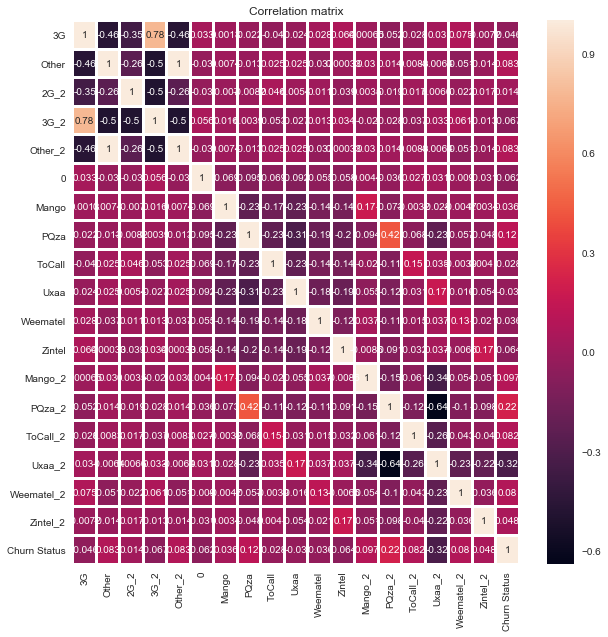

In [61]:
temp = selected_data.iloc[:,15:].join(selected_data['Churn Status'])
corr_matrix2 = temp.corr()
f, ax = plt.subplots(figsize=[10,10])
sns.heatmap(corr_matrix2, linewidths=2, ax=ax, annot=True)    # annot parameter sets the values.
#as you can see in heatmap, longitude are latitude
ax.set_title('Correlation matrix')
selected_data.columns[15:]

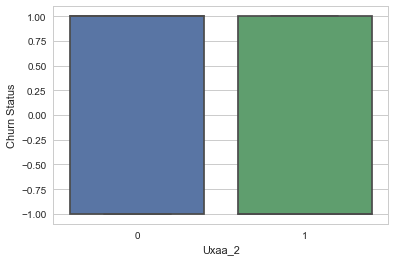

In [65]:
sns.boxplot(x = 'Uxaa_2', y='Churn Status', data = selected_data[['Uxaa_2', 'Churn Status']])

In [53]:
churned = selected_data[selected_data['Churn Status'] == 1].describe()
churned.to_csv("Churned summary.csv")

In [54]:
stayed = selected_data[selected_data['Churn Status'] == -1].describe()
stayed.to_csv("Stayed summary.csv")

In [30]:
train_x.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,46.963031,814.010138,30.854571,59.192786,2.188461e+06,197.853061,7055.438776,16593.917347,2.006122,0.375510,...,0.141837,0.235714,0.091837,0.113265,0.079592,0.218367,0.044898,0.591837,0.035714,0.029592
std,41.978792,1358.319306,62.853984,326.058484,6.847583e+06,306.787142,17968.006943,40911.511817,2.610571,0.484502,...,0.349061,0.424661,0.288943,0.317079,0.270798,0.413349,0.207186,0.491745,0.185672,0.169545
min,-0.130000,7.770000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.197500,153.226100,3.257500,1.250000,1.045639e+03,18.000000,120.000000,1280.250000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.085000,599.730000,14.340000,11.250000,1.040924e+05,76.000000,1739.500000,4371.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.847500,1005.517000,30.402500,41.250000,1.145864e+06,233.250000,7291.500000,13188.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,8.344973e+07,2596.000000,381174.000000,431440.000000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modelling and Evaluation

In [31]:
"""logReg = linear_model.LogisticRegression(C=1)
logReg.fit(train_x_std, train_y)
#Value of C=1 was obtained after some tries

train_preds_lr = logReg.predict(train_x_std)
cv_preds_lr = logReg.predict(cv_x_std)

train_acc_lr = accuracy_score(train_preds_lr, train_y)
cv_acc_lr = accuracy_score(cv_preds_lr, cv_y)"""

'logReg = linear_model.LogisticRegression(C=1)\nlogReg.fit(train_x_std, train_y)\n#Value of C=1 was obtained after some tries\n\ntrain_preds_lr = logReg.predict(train_x_std)\ncv_preds_lr = logReg.predict(cv_x_std)\n\ntrain_acc_lr = accuracy_score(train_preds_lr, train_y)\ncv_acc_lr = accuracy_score(cv_preds_lr, cv_y)'

In [32]:
"""print("Training accuracy for logistic regression is ", train_acc_lr)
print("CV accuracy for logistic regression is ", cv_acc_lr)"""

'print("Training accuracy for logistic regression is ", train_acc_lr)\nprint("CV accuracy for logistic regression is ", cv_acc_lr)'

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, min_samples_split=3)
random_forest.fit(train_x_std, train_y)

train_preds_rf = random_forest.predict(train_x_std)
cv_preds_rf = random_forest.predict(cv_x_std)

train_acc_rf = accuracy_score(train_preds_rf, train_y)
cv_acc_rf = accuracy_score(cv_preds_rf, cv_y)

In [34]:
print("Training accuracy for Random Forest is ", train_acc_rf)
print("CV accuracy for Random Forest is ", cv_acc_rf)

Training accuracy for Random Forest is  0.997959183673
CV accuracy for Random Forest is  0.842857142857


In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2, algorithm='brute')

knn.fit(train_x_std, train_y)

train_preds_knn = knn.predict(train_x_std)
cv_preds_knn = knn.predict(cv_x_std)

train_acc_knn = accuracy_score(train_preds_knn, train_y)
cv_acc_knn = accuracy_score(cv_preds_knn, cv_y)
# knn.score(X_train, Y_train)

In [58]:
print("Training accuracy for knn is ", train_acc_knn)
print("CV accuracy for knn is ", cv_acc_knn)

Training accuracy for knn is  0.807142857143
CV accuracy for knn is  0.595238095238


In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=50)

ada_boost.fit(train_x_std, train_y)

train_preds_ada = ada_boost.predict(train_x_std)
cv_preds_ada = ada_boost.predict(cv_x_std)

train_acc_ada = accuracy_score(train_preds_ada, train_y)
cv_acc_ada = accuracy_score(cv_preds_ada, cv_y)
# knn.score(X_train, Y_train)

In [38]:
print("Training accuracy for ada boost is ", train_acc_ada)
print("CV accuracy for ada boost is ", cv_acc_ada)

Training accuracy for ada boost is  0.84387755102
CV accuracy for ada boost is  0.847619047619


In [39]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

gbm = XGBClassifier(max_depth=4, n_estimators=50, learning_rate=0.05)
gbm.fit(train_x_std, train_y)

train_preds_xgb = gbm.predict(train_x_std)
cv_preds_xgb = gbm.predict(cv_x_std)

train_acc_xgb = accuracy_score(train_preds_xgb, train_y)
cv_acc_xgb = accuracy_score(cv_preds_xgb, cv_y)
# knn.score(X_train, Y_train)

In [40]:
print("Training accuracy for xgboost is ", train_acc_xgb)
print("CV accuracy for xgb boost is ", cv_acc_xgb)

Training accuracy for xgboost is  0.877551020408
CV accuracy for xgb boost is  0.869047619048


### Load test data and submit

In [41]:
test_data = pd.read_csv('TEST.csv')

test_data_ID = test_data['Customer ID']

test_data['Consistent competitor'] = (test_data['Most Loved Competitor network in in Month 1'
                                    ] == test_data['Most Loved Competitor network in in Month 2']).astype(int)
# if the competitor in month 1 and month 2 are the same, it gives a 1

test_data['Network Upgrade'] = 0

test_data.loc[(test_data['Network type subscription in Month 1'] == '2G') & 
              (test_data['Network type subscription in Month 2'] == '3G'), 'Network Upgrade'] = 1

test_data.loc[(test_data['Network type subscription in Month 1'] == '3G') & 
              (test_data['Network type subscription in Month 2'] == '2G'), 'Network Upgrade'] = -1
# if there is an upgrade in network, +1, downgrade: -1, else, 0


test_data['Offnet/Onnet'] = test_data['Total Offnet spend']/data['Total Onnet spend']
test_data['SMS/Data'] = test_data['Total SMS Spend']/data['Total Data Spend']

test_data.loc[(test_data['Total Onnet spend'] >=-0.001) & (test_data['Total Onnet spend']<=0.001) & 
         (test_data['Total Offnet spend'] >= -0.001) & (test_data['Total Offnet spend'] <= 0.001), 'Offnet/Onnet'] = 1

test_data.loc[data["Offnet/Onnet"] == math.inf, "Offnet/Onnet"] = max(test_data.loc[data["Offnet/Onnet"] != math.inf, "Offnet/Onnet"])

test_data.loc[(test_data['Total Data Spend'] >= -0.001) & (test_data['Total Data Spend'] <= 0.001) & 
         (test_data['Total SMS Spend'] >= -0.001) & (test_data['Total SMS Spend'] <= 0.001), 'SMS/Data'] = 1

data.loc[data["SMS/Data"] == math.inf, "SMS/Data"] = max(data.loc[data["SMS/Data"] != math.inf, "SMS/Data"])


selected_test = test_data.drop(['network_age', 'Customer ID'], axis=1)
# drop network_age because of the correlation results obtained in training. It is also obtained in the test data two cells below

#run the same procedure to get dummy variables
tnetwork_month1_dummy = pd.get_dummies(selected_test['Network type subscription in Month 1'])
selected_test = selected_test.join(tnetwork_month1_dummy, rsuffix = "_1")
selected_test.drop('Network type subscription in Month 1', axis=1, inplace=True)

tnetwork_month2_dummy = pd.get_dummies(selected_test['Network type subscription in Month 2'])
selected_test = selected_test.join(tnetwork_month2_dummy, rsuffix = "_2")
selected_test.drop('Network type subscription in Month 2', axis=1, inplace=True)

tcompetitor_month1_dummy = pd.get_dummies(selected_test['Most Loved Competitor network in in Month 1'])
selected_test = selected_test.join(tcompetitor_month1_dummy, rsuffix = "_1")
selected_test.drop('Most Loved Competitor network in in Month 1', axis=1, inplace=True)

tcompetitor_month2_dummy = pd.get_dummies(selected_test['Most Loved Competitor network in in Month 2'])
selected_test = selected_test.join(tcompetitor_month2_dummy, rsuffix = "_2")
selected_test.drop('Most Loved Competitor network in in Month 2', axis=1, inplace=True)

In [42]:
selected_test.columns

Index(['Customer tenure in month', 'Total Spend in Months 1 and 2 of 2017',
       'Total SMS Spend', 'Total Data Spend', 'Total Data Consumption',
       'Total Unique Calls', 'Total Onnet spend', 'Total Offnet spend',
       'Total Call centre complaint calls', 'Consistent competitor',
       'Network Upgrade', 'Offnet/Onnet', 'SMS/Data', '2G', '3G', 'Other',
       '2G_2', '3G_2', 'Other_2', '0', 'Mango', 'PQza', 'ToCall', 'Uxaa',
       'Weematel', 'Zintel', 'Mango_2', 'PQza_2', 'ToCall_2', 'Uxaa_2',
       'Weematel_2', 'Zintel_2'],
      dtype='object')

In [43]:
test_data[['network_age', 'Customer tenure in month']].corr()

,network_age,Customer tenure in month
network_age,1.0,1.0
Customer tenure in month,1.0,1.0


In [44]:
selected_test.describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,50.456722,1136.902985,32.775350,59.561583,4.201155e+06,330.716667,8804.033333,18154.278333,1.930000,0.281667,...,0.140000,0.203333,0.116667,0.148333,0.061667,0.191667,0.03000,0.638333,0.038333,0.040000
std,43.716561,828.916189,50.290467,91.981495,1.216901e+07,481.736778,15912.129544,25483.237987,2.069357,0.450187,...,0.347277,0.402814,0.321291,0.355727,0.240750,0.393941,0.17073,0.480884,0.192160,0.196123
min,-0.266667,225.932800,0.000000,0.000000,1.211000e-01,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,13.008333,403.342500,5.250000,2.500000,1.889670e+04,45.750000,257.750000,2401.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,41.533333,942.639600,17.940000,23.750000,4.653526e+05,152.000000,2526.500000,8096.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,75.208333,1699.786000,39.715000,73.750000,2.433745e+06,470.250000,10688.500000,21142.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,178.766667,3491.134800,567.380000,748.750000,1.550312e+08,5727.000000,145839.000000,158521.000000,17.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [45]:
train_x.columns.values == selected_test.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [46]:
#selected_test_std = std_scaler.transform(selected_test)

selected_test_std = selected_test

In [47]:
pd.DataFrame(selected_test_std).describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.00000,600.000000,600.000000,600.000000
mean,50.456722,1136.902985,32.775350,59.561583,4.201155e+06,330.716667,8804.033333,18154.278333,1.930000,0.281667,...,0.140000,0.203333,0.116667,0.148333,0.061667,0.191667,0.03000,0.638333,0.038333,0.040000
std,43.716561,828.916189,50.290467,91.981495,1.216901e+07,481.736778,15912.129544,25483.237987,2.069357,0.450187,...,0.347277,0.402814,0.321291,0.355727,0.240750,0.393941,0.17073,0.480884,0.192160,0.196123
min,-0.266667,225.932800,0.000000,0.000000,1.211000e-01,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,13.008333,403.342500,5.250000,2.500000,1.889670e+04,45.750000,257.750000,2401.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,41.533333,942.639600,17.940000,23.750000,4.653526e+05,152.000000,2526.500000,8096.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,75.208333,1699.786000,39.715000,73.750000,2.433745e+06,470.250000,10688.500000,21142.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
max,178.766667,3491.134800,567.380000,748.750000,1.550312e+08,5727.000000,145839.000000,158521.000000,17.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [48]:
pd.DataFrame(train_x_std).describe()

,Customer tenure in month,Total Spend in Months 1 and 2 of 2017,Total SMS Spend,Total Data Spend,Total Data Consumption,Total Unique Calls,Total Onnet spend,Total Offnet spend,Total Call centre complaint calls,Consistent competitor,...,ToCall,Uxaa,Weematel,Zintel,Mango_2,PQza_2,ToCall_2,Uxaa_2,Weematel_2,Zintel_2
count,980.000000,980.000000,980.000000,980.000000,9.800000e+02,980.000000,980.000000,980.000000,980.000000,980.000000,...,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,46.963031,814.010138,30.854571,59.192786,2.188461e+06,197.853061,7055.438776,16593.917347,2.006122,0.375510,...,0.141837,0.235714,0.091837,0.113265,0.079592,0.218367,0.044898,0.591837,0.035714,0.029592
std,41.978792,1358.319306,62.853984,326.058484,6.847583e+06,306.787142,17968.006943,40911.511817,2.610571,0.484502,...,0.349061,0.424661,0.288943,0.317079,0.270798,0.413349,0.207186,0.491745,0.185672,0.169545
min,-0.130000,7.770000,0.000000,0.000000,5.860000e-02,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.197500,153.226100,3.257500,1.250000,1.045639e+03,18.000000,120.000000,1280.250000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.085000,599.730000,14.340000,11.250000,1.040924e+05,76.000000,1739.500000,4371.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,72.847500,1005.517000,30.402500,41.250000,1.145864e+06,233.250000,7291.500000,13188.750000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,181.700000,24438.830000,873.980000,8295.000000,8.344973e+07,2596.000000,381174.000000,431440.000000,49.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
test_preds = gbm.predict(selected_test_std)
test_preds[test_preds == -1] = 0

test_preds.astype(int)
test_preds_b = test_preds.copy()

"""test_preds[test_preds_b == 0] = 1
test_preds[test_preds_b == 1] = 0"""

'test_preds[test_preds_b == 0] = 1\ntest_preds[test_preds_b == 1] = 0'

In [50]:
d = {'Customer ID': test_data_ID, 'Churn Status': test_preds}
test_df = pd.DataFrame(d)
test_df = test_df[['Customer ID', 'Churn Status']]
test_df.to_csv('Submission.csv', index=False)